
# Gaussian Mixture Model Ellipsoids


Plot the confidence ellipsoids of a mixture of two Gaussians
obtained with Expectation Maximisation (``GaussianMixture`` class) and
Variational Inference (``BayesianGaussianMixture`` class models with
a Dirichlet process prior).

Both models have access to five components with which to fit the data. Note
that the Expectation Maximisation model will necessarily use all five
components while the Variational Inference model will effectively only use as
many as are needed for a good fit. Here we can see that the Expectation
Maximisation model splits some components arbitrarily, because it is trying to
fit too many components, while the Dirichlet Process model adapts it number of
state automatically.

This example doesn't show it, as we're in a low-dimensional space, but
another advantage of the Dirichlet process model is that it can fit
full covariance matrices effectively even when there are less examples
per cluster than there are dimensions in the data, due to
regularization properties of the inference algorithm.


In [9]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn
from sklearn import datasets
from sklearn import mixture

from sklearn.preprocessing import StandardScaler

%matplotlib inline

Generate example datasets with different features.

In [10]:
np.random.seed(1234)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
C = np.array([[2.0, -0.1], [1.7, .4]])

noisy_circles = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
diagonal = np.r_[
    np.dot(np.random.randn(n_samples, 2), np.array([[0.2, 0.2], [1, .4]])), 
#     .7 * np.random.randn(n_samples/3, 2) + np.array([-6, 3]),
    np.array([-1, -6])+np.dot(np.random.randn(n_samples, 2), np.array([[1.0, -0.5], [-1, .2]]))
]

diagonal = [diagonal, [0]*n_samples + [1]*n_samples]

# colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
# colors = np.hstack([colors] * 20)

datasets = [noisy_circles, noisy_moons, blobs, diagonal, no_structure]
datasets_components = [2,2,3,2,2]

Define a function to plot the clustering results

In [38]:
def plot_results(X, Y_, means, covariances, index, title):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold', 'darkorange'])
    splot = plt.subplot(len(datasets), 2, 1 + index)
#     print(len(datasets)*2," ",1+index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
#     plt.xticks(())
#     plt.yticks(())
    if index<2:
        plt.title(title)




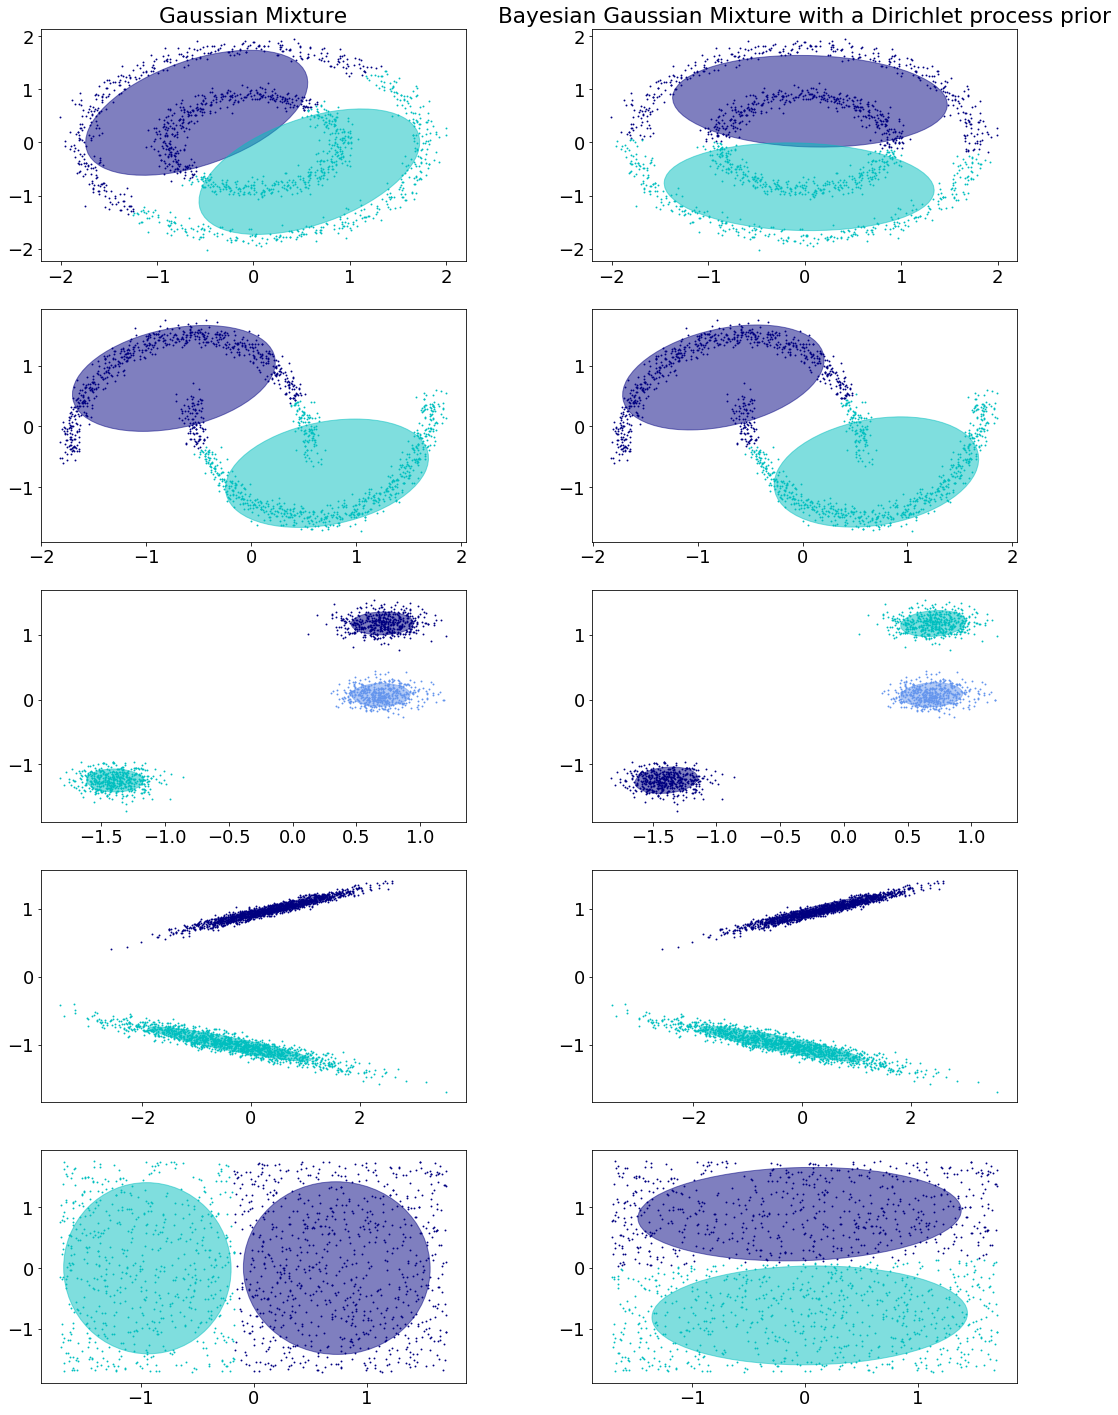

In [41]:
plt.figure(i_dataset, figsize=(16, 20))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)

for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    gmm = mixture.GaussianMixture(n_components=datasets_components[i_dataset], covariance_type='full').fit(X)
    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 2*i_dataset, 'Gaussian Mixture')

    # Fit a Dirichlet process Gaussian mixture using five components
    dpgmm = mixture.BayesianGaussianMixture(n_components=datasets_components[i_dataset], covariance_type='full').fit(X)
    plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 2*i_dataset+1, 'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.tight_layout();
plt.show();





    






    
